# Proyecto integrado

## Descripción del proyecto

Trabajas para la tienda online Ice que vende videojuegos por todo el mundo. Las reseñas de usuarios y expertos, los géneros, las plataformas (por ejemplo, Xbox o PlayStation) y los datos históricos sobre las ventas de juegos están disponibles en fuentes abiertas. Tienes que identificar patrones que determinen si un juego tiene éxito o no. Esto te permitirá detectar proyectos prometedores y planificar campañas publicitarias.

Delante de ti hay datos que se remontan a 2016. Imaginemos que es diciembre de 2016 y estás planeando una campaña para 2017.

Lo importante es adquirir experiencia de trabajo con datos. Realmente no importa si estás pronosticando las ventas de 2017 en función de los datos de 2016 o las ventas de 2027 en función de los datos de 2026.

El dataset contiene una columna "rating" que almacena la clasificación ESRB de cada juego. El Entertainment Software Rating Board (la Junta de clasificación de software de entretenimiento) evalúa el contenido de un juego y asigna una clasificación de edad como Adolescente o Adulto.

In [832]:
#Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

## Parte 1. Descripción de los Datos



### Diccionario de datos

**games_csv** cada fila corresponde a un video juego:

- `Name`: Nombre.
- `Platform`: Plataforma.
- `Year_of_Release`: Año de lanzamiento.
- `Genre`: Género.
- `NA_sales`: ventas en Norteamérica en millones de dólares estadounidenses.
- `EU_sales`: ventas en Europa en millones de dólares estadounidenses.
- `JP_sales`:ventas en Japón en millones de dólares estadounidenses.
- `Other_sales`: ventas en otros países en millones de dólares estadounidenses. 
- `Critic_Score`: máximo de 100. 
- `User_Score`: máximo de 10.
- `Rating`: (ESRB).
    - E (Everyone): Apropiado para todas las edades.
    - E10+ (Everyone 10 and older): Apropiado para mayores de 10 años.
    - T (Teen): Apropiado para mayores de 13 años. Puede contener violencia, temas sugestivos, humor grosero, sangre mínima, insinuaciones de contenido sexual y/o lenguaje fuerte.
    - M (Mature): Apropiado para mayores de 17 años. Puede contener violencia intensa, sangre y gore, contenido sexual y/o lenguaje fuerte.
    - AO (Adults Only): Solo para adultos mayores de 18 años. Puede contener contenido sexual explícito, violencia extrema y/o lenguaje muy fuerte.
    - EC (Early Childhood): Apropiado para niños pequeños. Diseñado para niños de 3 años en adelante y no contiene material que los padres encontrarían inapropiado.
    - K-A (Kids to Adults): Anteriormente utilizado, ahora reemplazado por la clasificación "E". Significaba que el juego era adecuado para niños y adultos.
    - RP (Rating Pending): Clasificación pendiente. Se utiliza cuando un juego aún no ha sido clasificado oficialmente por la ESRB.

In [833]:
#Leer conjunto de datos
df_games = pd.read_csv('games.csv')

In [834]:
#mostrar información del dataframe
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [835]:
display(df_games)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Conclusiones:

- los encabezados deben estar en minúsculas;
- los valores de las columnas no están guardados en los valores que les corresponden;
- cuenta con valores ausentes.


## Parte 2. Preparar datos

Preparamos los datos para ser analizados.

In [836]:
#Cambiar nombres de columnas a minúsculas
df_games.columns

def nombres_a_minusculas(df):
    # Obtener los nombres de las columnas actuales
    columnas = df.columns
    
    # Crear una lista con los nombres de columnas en minúsculas
    columnas_minusculas = [columna.lower() for columna in columnas]
    
    # Asignar los nuevos nombres de columnas al DataFrame
    df.columns = columnas_minusculas
    
    return df

df_games= nombres_a_minusculas(df_games)

print(df_games.columns)

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


In [837]:
#Verificar filas duplicadas
display(df_games.duplicated().sum())

#Aseguramos que todos los valores de fecha se puedan trabajar como datos numéricos e ignorámos los inválidos por NaN.
df_games['year_of_release'] = pd.to_numeric(df_games['year_of_release'], errors= 'coerce')

type_y= df_games['year_of_release'].dtype

#Imprimimos el tipo de dato para cada columna
print(F'La columna "year_of_release" contiene datos tipo: {type_y}')



0

La columna "year_of_release" contiene datos tipo: float64


In [838]:
#Corregir valores de 'user_score' a tipo float
df_games['user_score'] = df_games['user_score'].replace('tbd', np.nan)
df_games['user_score'] = df_games['user_score'].astype('float')

df_games['user_score'].unique()

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

### Revisión valores ausentes

In [839]:
#Valores nulos de 'name'
display(df_games[df_games['name'].isna()])

#Valores nulos de 'genre'
display(df_games[df_games['genre'].isna()])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [840]:
# Eliminar filas con valores NaN en la columna 'name' y 'rating' 
df_games = df_games.dropna(subset=['name'])

# Eliminar filas con valores NaN en la columna 'year_of_release'
df_games = df_games.dropna(subset= ['year_of_release'])

In [841]:
#Verificar cuantos valores NaN quedan por columna
100*df_games.isna().sum()/df_games.shape[0]

name                0.000000
platform            0.000000
year_of_release     0.000000
genre               0.000000
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
critic_score       51.453418
user_score         54.615665
rating             40.598395
dtype: float64

### Agregamos la columna de 'total_sales'

In [842]:
#Añadir columna de 'total_sales' al dataframe.

df_games['total_sales'] = df_games['na_sales'] + df_games['eu_sales'] + df_games['jp_sales'] + df_games['other_sales']

display(df_games.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


In [843]:
#Contamos cuantos juegos tienen valores nulos en critic_score, user_score y rating.

filtered_nan_scores_and_rating= df_games[df_games['critic_score'].isna() & df_games['user_score'].isna() & df_games['rating'].isna()]

display(filtered_nan_scores_and_rating)

100*filtered_nan_scores_and_rating.shape[0]/df_games.shape[0]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,30.26
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,28.31
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN,24.67
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


40.014594989053755

In [844]:
#Comprobamos si tenemos valores duplicados en nombre de video juego
display(df_games['name'].value_counts())

#value_counts().sort_index()

name
Need for Speed: Most Wanted               12
LEGO Marvel Super Heroes                   9
Ratatouille                                9
FIFA 14                                    9
Terraria                                   8
                                          ..
Loving Life with Hello Kitty & Friends     1
Scrabble (Others sales)                    1
Viva Pinata: Party Animals                 1
Sands of Destruction                       1
Haitaka no Psychedelica                    1
Name: count, Length: 11426, dtype: int64

### Conclusiones:

- Eliminamos las filas que contienen valores nulos en la columna "year_of_release" ya que representan el 2% de los datos, por lo que no es una cantidad significativa.
- Eliminamos las filas que contienen valores nulos en la columna "name" y "genre" ya que sólo cuentan con 2 juegos, por lo que no es significativo.
- Tenemos 6580 filas con valores ausentes en las columnas 'critic_score', 'user_score' y 'rating' y corresponde al 40% de los datos. Se sugiere hacer una investigación de porque existen juegos sin 'rating' o tipo de clasificación.
- Contamos con valores duplicados en la columna 'name'.
- Mentendremos los valores NaN en las columnas de scores ya que la proporción de los valores ausentes es bastante grande y eliminarlas podría alterar la distribución.
- Cambiamos los valores "TBD" a NaN en la columna "user_score".


## Parte 3. Analiza los datos

### Juegos lanzados por año

- ¿Cuántos juegos fueron lanzados por año? ¿son significativos los datos de cada periodo?
- ¿Cómo varían las ventas de una plataforma a otra? Elegir plataformas con mayores ventas totales y construye una distribución basada en los datos de cada año. ¿Existen plataformas que solían ser populares y que ahora ya no tienen ventas? ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?

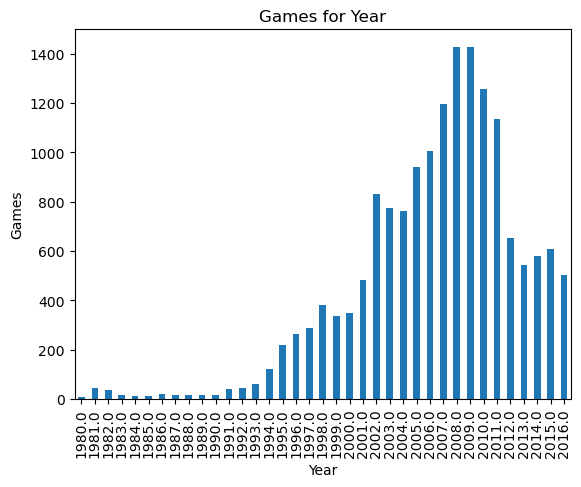

In [845]:
#Juegos lanzados por año
games_for_year= df_games.groupby('year_of_release')['name'].size().reset_index()
#display(games_for_year.sort_index())

#Gráfico de dispersión de juegos creados por año
games_for_year.plot(x='year_of_release',
        kind='bar',
        title='Games for Year',
        xlabel='Year',
        ylabel='Games',
        legend=False)

plt.show()


Observaciones generales:

Podemos ver que entre el 2005 y el 2010 hubo un aumento exponencial en la cantidad de juegos lanzados por año, siendo 2008 y 2009 los años con mayor lanzamiento de juegos con un total alrededor de los 1400 juegos.
Los siguientes años reduce la cantidad a la mitad y se mantiene entre los 600 y 400 juegos por año.

### Ventas totales por plataforma

In [846]:
#Ventas por plataforma
console_sales = df_games.groupby('platform')['total_sales'].sum().reset_index()

#Las 10 consolas con mayores ventas
top_console_sales = console_sales.sort_values(by= 'total_sales', ascending=False).head()

#Lista de las 10 plataformas principales
platforms_list = top_console_sales['platform'].tolist()

display(top_console_sales)
display(platforms_list)

,platform,total_sales
16,PS2,1233.56
28,X360,961.24
17,PS3,931.34
26,Wii,891.18
4,DS,802.78


['PS2', 'X360', 'PS3', 'Wii', 'DS']

In [847]:
#Seleccionamos los datos de las filas donde estén presentes las plataformas de nuestra lista
games_2 = df_games[df_games['platform'].isin(platforms_list)]

plarform_distrubution = games_2.groupby(['year_of_release', 'platform'])['total_sales'].sum().reset_index()

plarform_distrubution.head()


,year_of_release,platform,total_sales
0,1985.0,DS,0.02
1,2000.0,PS2,39.17
2,2001.0,PS2,166.43
3,2002.0,PS2,205.38
4,2003.0,PS2,184.31


c:\Users\evely\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\evely\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\evely\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\evely\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

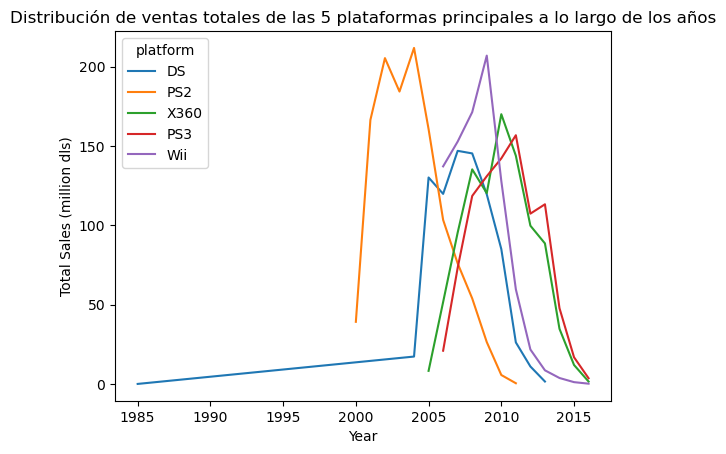

In [848]:
sns.lineplot(data=plarform_distrubution, 
             x='year_of_release',
             y='total_sales',
             hue='platform')

plt.xlabel('Year')
plt.ylabel('Total Sales (million dls)')
plt.title('Distribución de ventas totales de las 5 plataformas principales a lo largo de los años')

plt.show()

In [849]:
DS = df_games[df_games['platform'] == 'DS']
DS1 = df_games[(df_games['platform'] == 'DS') & (df_games['year_of_release'] > 2000)]
DS2 = df_games[(df_games['platform'] == 'DS') & (df_games['year_of_release'] < 2000)]

display(DS.shape)
display(DS1.shape)
display(DS2.shape)
display(DS2)

(2121, 12)

(2120, 12)

(1, 12)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15957,Strongest Tokyo University Shogi DS,DS,1985.0,Action,0.0,0.0,0.02,0.0,NaN,NaN,NaN,0.02


In [850]:
#Eliminamos el juego DS que fue creado en 1985 ya que es el único y para evitar problemas al viasualizar la gráfica
df_games = df_games.drop(df_games[(df_games['platform'] == 'DS') & (df_games['year_of_release'] < 2000)].index)

In [851]:
#Seleccionamos las filas que tenga las ventas posteriores al 2000 del dataframe previamente filtrado con las 5 consolas más vendidas
games_2 = games_2[games_2['year_of_release'] > 2000]

games_2

#6986

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
...,...,...,...,...,...,...,...,...,...,...,...,...
16700,Mezase!! Tsuri Master DS,DS,2009.0,Sports,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.00,0.00,NaN,NaN,E,0.01
16709,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,0.00,0.00,0.00,0.00,NaN,NaN,NaN,0.00
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


Observaciones generales:

- Las consolas tienen un ciclo de vida donde las consolas aumentan los primeros años y desciende luego de un periodo máximo de 6 años.
- La plataforma DS tiene un outlier que corresponde a un sólo juego que fue creado al rededor de 1985, decidí eliminarlo, ya que la plataforma DS fue lanzada en el 2004 y es probable que los datos registrados para ESE juego sean incorrectos.
- Los años con mayores ventas (2005-2011) coincide con los años de lanzamiento de nuevas plataformas como DS, Wii, X360 Y PS3 que es el siguiente del PS2.
- También podemos observar que entre las 5 consolas que más ventas han generado, se encuentran 2 versiones de PS.

### Distribución de ventas totales por plataforma

Text(0.5, 0, 'Platform')

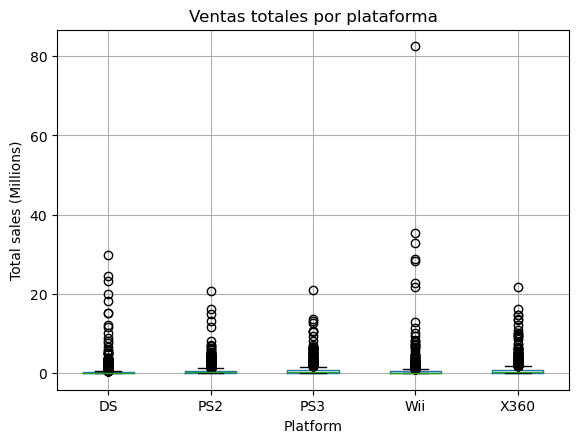

In [852]:
games_2.boxplot(column= 'total_sales', by= 'platform')

plt.title('Ventas totales por plataforma')
plt.suptitle('')
plt.ylabel('Total sales (Millions)')
plt.xlabel('Platform')

Text(0.5, 0, 'Platform')

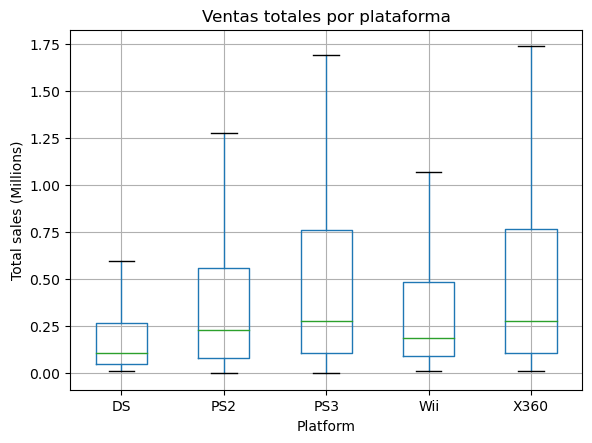

In [853]:
games_2.boxplot(column= 'total_sales', by= 'platform',  showfliers= False)

plt.title('Ventas totales por plataforma')
plt.suptitle('')
plt.ylabel('Total sales (Millions)')
plt.xlabel('Platform')

In [854]:
#Observamos cuales son los juegos más vendidos de las 5 consolas con mayores ventas
best_games = games_2[(games_2['total_sales'] > 10 ) & (games_2['year_of_release'] >= 2004)].sort_values(by='total_sales', ascending= False)

display(best_games.head())

#Obtenemos la media de las ventas totales de los juegos que salieron después del 2000 de nuestras 5 plataformas principales

mean=  games_2.groupby('platform')['total_sales']
mean.describe()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91


,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
DS,2120.0,0.378660,1.436359,0.01,0.05,0.11,0.2700,29.80
PS2,2045.0,0.584054,1.154305,0.00,0.08,0.23,0.5600,20.81
PS3,1306.0,0.713124,1.403065,0.00,0.11,0.28,0.7600,21.05
Wii,1286.0,0.692986,3.165022,0.01,0.09,0.19,0.4875,82.54
X360,1232.0,0.780227,1.632122,0.01,0.11,0.28,0.7700,21.82


Observaciones generales:

Gráfica de caja:
- La consola Wii tiene un valor atípico de hasta 80 millones por lo que no permite visualizar bien la primera gráfica de caja sin descartar los valores atípicos.
- Cada consola tuvo por lo menos un juego que fue un gran éxito por encima del promedio por lo que obtenemos una asimatría positiva, es decir que la media es mucho mayor a la mediana.
- La media de la venta total por consola va desde los 0.37 millones hasta los 0.78 millones  y la mediana ronda entre 0.10 y 0.27 millones, lo que significa que tenemos sesgo a la derecha.
- Wii tiene el juego que más ventas ha generado, este fue Wii Sports y y es categoría E.

### Correlación entre las ventas totales y scores de Wii

0.1707254398474699

0.11098055169353921

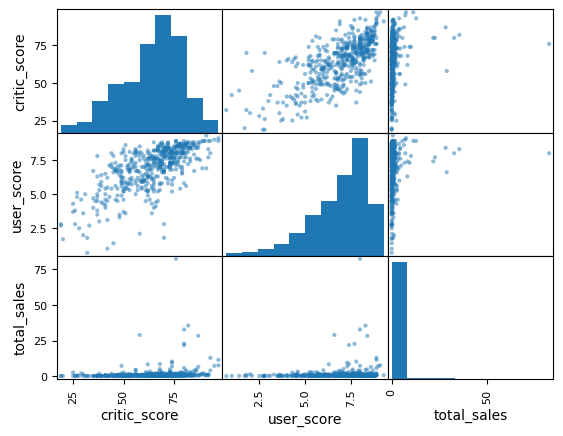

In [855]:
#Correlación entre las reseñas y las ventas totales de Wii

wii= games_2[games_2['platform'] == 'Wii'].dropna()

#correlación critic score con ventas totales
corr_cs_wii= wii['critic_score'].corr(wii['total_sales'])
#correlación user score con ventas totales
corr_us_wii= wii['user_score'].corr(wii['total_sales']) 

display(corr_cs_wii)
display(corr_us_wii)

correlation_data_wii = wii[['critic_score', 'user_score','total_sales']]

# Crear el gráfico de dispersión
pd.plotting.scatter_matrix(correlation_data_wii)
plt.show()


0.3867041285218064

0.16967010794637444

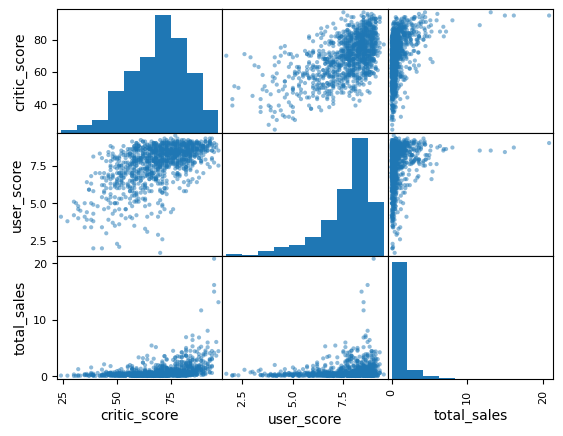

In [856]:
#Correlación entre las reseñas y las ventas totales de PS4

ps2= games_2[games_2['platform'] == 'PS2'].dropna()

#correlación critic score con ventas totales
corr_cs_ps2= ps2['critic_score'].corr(ps2['total_sales'])
#correlación user score con ventas totales
corr_us_ps2= ps2['user_score'].corr(ps2['total_sales'])

display(corr_cs_ps2)
display(corr_us_ps2)

correlation_data_sp2 = ps2[['critic_score', 'user_score','total_sales']]

# Crear el gráfico de dispersión
pd.plotting.scatter_matrix(correlation_data_sp2)
plt.show()


Observaciones generales:

- No hay una correlación fuerte entre los scores y las ventas totales de la consola Wii ni de la consola PS2.
- También  podemos observar que a medida que aumenta el 'critic_score' también aumenta el 'user_score' de ambas plataformas.

### Juegos multiplataforma

In [857]:
#Agrupamos los juegos por plataforma
videogames = games_2.groupby('name')['platform'].count().reset_index()

#Filtramos los juegos que sean multiplataforma
mp_videogames = videogames[videogames['platform'] > 1]

#Creamos una lista con los nombres de los juegos multiplataforma
duplicated_games = mp_videogames['name'].tolist()

#Obtenemos un dataframe filtrado con la lista de juegos que son multiplataforma de la anterior tabla que filtra los juegos más vendidos que salieron después del 2004
mp_best_games= games_2[(games_2['name'].isin(duplicated_games)) & (games_2['total_sales'] > 10)]

#display(mp_best_games.groupby('name')['platform'].count().reset_index())

#Filtramos los juegos que salen repetidos
filtered_mp_best_games = mp_best_games[mp_best_games.groupby('name')['platform'].transform('count') > 1]

#display(filtered_mp_best_games)
display(filtered_mp_best_games.groupby('name')['platform'].count().reset_index())
filtered_mp_best_games

,name,platform
0,Call of Duty: Black Ops,2
1,Call of Duty: Black Ops II,2
2,Call of Duty: Modern Warfare 2,2
3,Call of Duty: Modern Warfare 3,2
4,Grand Theft Auto IV,2
5,Grand Theft Auto V,2


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
29,Call of Duty: Modern Warfare 3,X360,2011.0,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,M,14.73
32,Call of Duty: Black Ops,X360,2010.0,Shooter,9.70,3.68,0.11,1.13,87.0,6.3,M,14.62
34,Call of Duty: Black Ops II,PS3,2012.0,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
35,Call of Duty: Black Ops II,X360,2012.0,Shooter,8.25,4.24,0.07,1.12,83.0,4.8,M,13.68
36,Call of Duty: Modern Warfare 2,X360,2009.0,Shooter,8.52,3.59,0.08,1.28,94.0,6.3,M,13.47
37,Call of Duty: Modern Warfare 3,PS3,2011.0,Shooter,5.54,5.73,0.49,1.57,88.0,3.2,M,13.33
41,Call of Duty: Black Ops,PS3,2010.0,Shooter,5.99,4.37,0.48,1.79,88.0,6.4,M,12.63
51,Grand Theft Auto IV,X360,2008.0,Action,6.76,3.07,0.14,1.03,98.0,7.9,M,11.00


c:\Users\evely\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\evely\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\evely\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\evely\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

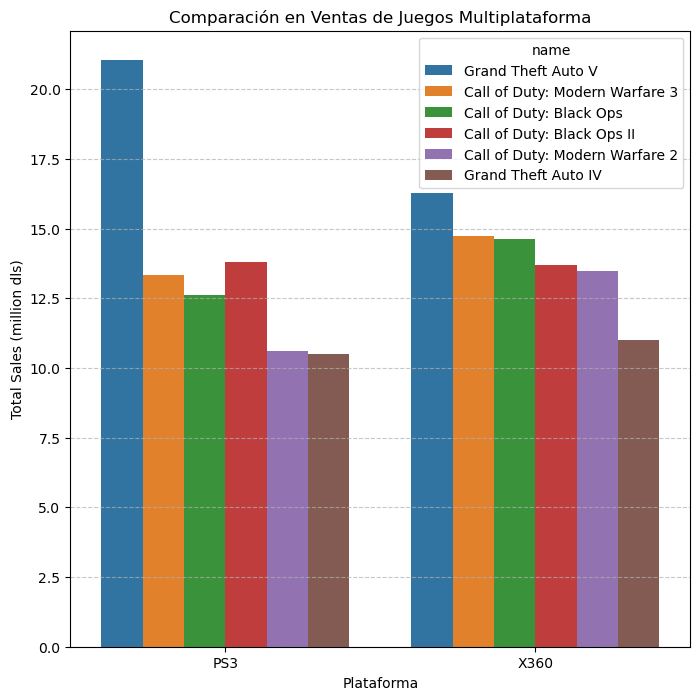

In [858]:
#Comparamos las ventas de los juegos multiplataforma

# Configurar tamaño de la figura
plt.figure(figsize=(8, 8))
sns.barplot(data=filtered_mp_best_games, 
             x='platform',
             y='total_sales',
             hue='name')


plt.xlabel('Plataforma')
plt.ylabel('Total Sales (million dls)')
plt.title('Comparación en Ventas de Juegos Multiplataforma')
plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.show()

Observaciones generales:

Los juegos multiplataforma con ventas mayores a 10 millones pertenecen principalmente al género de ‘Shooter’ y ‘Action’, su rating (ESRB) corresponde a “M” y existen para consolas como Xbox 360 y PlayStation 3.

### Distribución general de los juegos por género

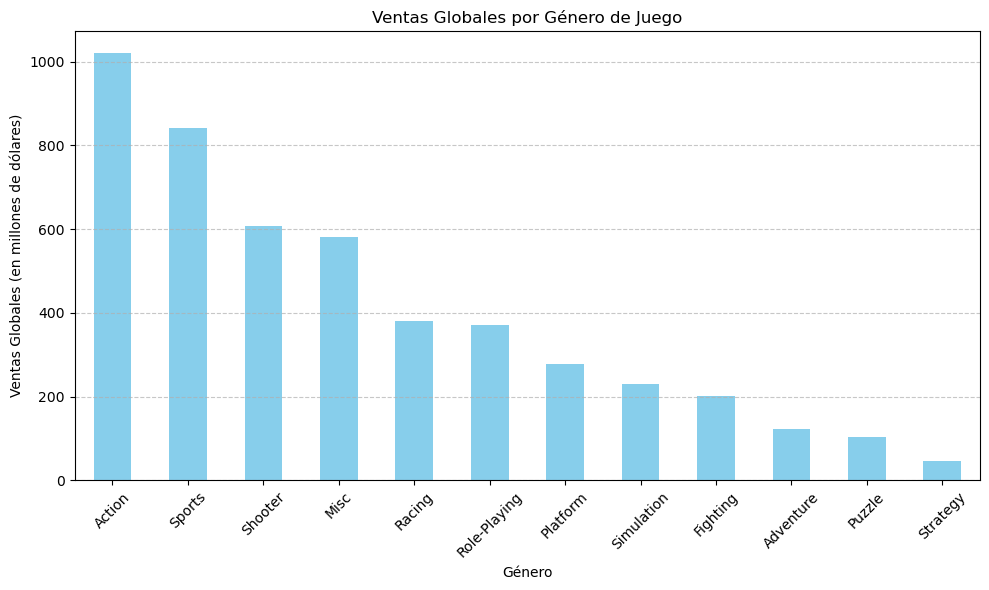

In [892]:
# Agrupar los datos por género y calcular las ventas globales totales para cada género
genre_sales = games_2.groupby('genre')['total_sales'].sum().sort_values(ascending=False)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
genre_sales.plot(kind='bar', color='skyblue')
plt.title('Ventas Globales por Género de Juego')
plt.xlabel('Género')
plt.ylabel('Ventas Globales (en millones de dólares)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [899]:
#Filtramos una tabla con los géneros más vendidos 
genres = games_2.groupby('genre')['total_sales'].sum().reset_index().sort_values(by='total_sales', ascending=False).head()
genre_list = genres['genre'].tolist()
top_genres= games_2[games_2['genre'].isin(genre_list)]

#Agrupamos los géneros por ventas
genre_mean = top_genres.groupby('genre')['total_sales']

#Obtenemos la media de las ventas de los 5 géneros más vendidos
genre_mean.describe()

,count,mean,std,min,25%,50%,75%,max
genre,,,,,,,,
Action,1590.0,0.642472,1.409249,0.01,0.10,0.25,0.600,21.05
Misc,1121.0,0.518011,1.557597,0.01,0.07,0.16,0.420,28.91
Racing,550.0,0.691618,2.147550,0.00,0.09,0.23,0.610,35.52
Shooter,607.0,1.001351,2.051812,0.01,0.10,0.34,0.935,14.73
Sports,1193.0,0.704744,2.842942,0.00,0.10,0.23,0.610,82.54


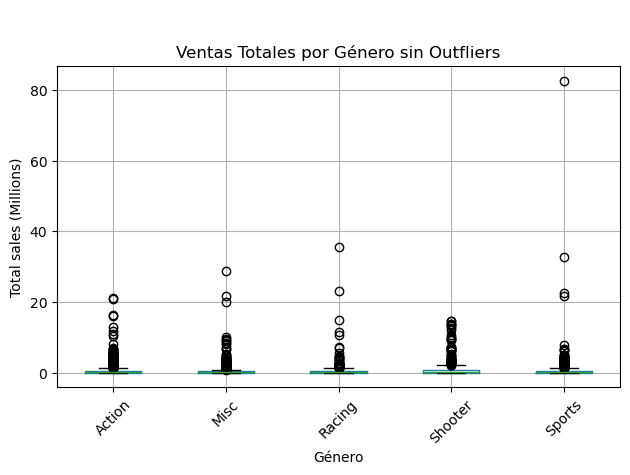

In [898]:
#Creamos un gráfico de caja para las ventas totales por Género
top_genres.boxplot(column= 'total_sales', by= 'genre')

plt.title('Ventas Totales por Género sin Outfliers')
plt.suptitle(' ')
plt.ylabel('Total sales (Millions)')
plt.xlabel('Género')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

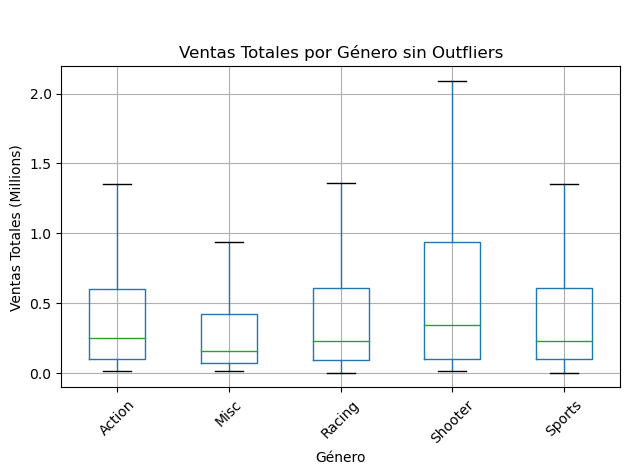

In [897]:
#Creamos un gráfico de caja para las ventas totales por género sin mostrar los valores atípicos
top_genres.boxplot(column= 'total_sales', by= 'genre',  showfliers= False)

plt.title('Ventas Totales por Género sin Outfliers')
plt.suptitle(' ')
plt.ylabel('Ventas Totales (Millions)')
plt.xlabel('Género')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

### Conclusiones generales:

* Por el gráfico de barras podemos observar que los juegos de "Sports" y "Acción" son los dos géneros con mayores ventas acumuladas.
* Podemos observar mucho sesgo positivo en los juegos de Sports ya que la media ronda por los 0.70 millones mientras que la mediana muestra que ronda por los 0.23 millones, esto se debe a valores atípicos de hasta 80 millones.
* En el caso de los juegos de Acción, el promedio de las ventas ronda por los 0.64 millones y la mediana está entre los 0.25 millones. El 75% de sus ventas están por debajo de los 0.60 millones.
* En cuanto a Shooter, la mediana es de 1 millon, la mediana ronda por los 0.35 millones y el 75% de los juegos vendidos están por debajo de 0.90 millones con valores máximos de 2 millones.


## Paso 4. Crear un perfil de usuario para cada región

Para cada región (NA, EU, JP) determina:

- Las cinco plataformas principales. Describe las variaciones en sus cuotas de mercado de una región a otra.
- Los cinco géneros principales. Explica la diferencia.
- Si las clasificaciones de ESRB afectan a las ventas en regiones individuales.

In [863]:
#Agrupamos las ventas de cada consola por región
market = games_2.groupby('platform').agg({'na_sales':'sum', 'eu_sales':'sum', 'jp_sales':'sum'}).reset_index()
market

,platform,na_sales,eu_sales,jp_sales
0,DS,380.31,188.41,175.00
1,PS2,556.84,321.99,128.67
2,PS3,390.13,327.21,79.41
3,Wii,486.87,258.32,68.28
4,X360,595.74,268.32,12.30


In [906]:
market_sales = pd.melt(market, id_vars= ['platform'], value_vars= ['na_sales', 'eu_sales', 'jp_sales'], var_name= 'market', value_name='sales')
market_sales.head()

,platform,market,sales
0,DS,na_sales,380.31
1,PS2,na_sales,556.84
2,PS3,na_sales,390.13
3,Wii,na_sales,486.87
4,X360,na_sales,595.74


c:\Users\evely\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\evely\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\evely\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\evely\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

<Axes: xlabel='market', ylabel='sales'>

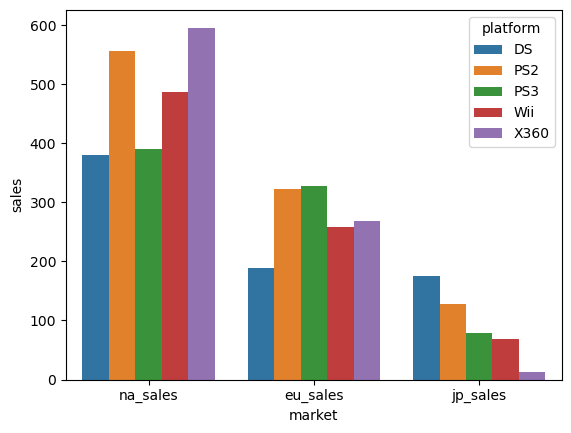

In [865]:
#Creamos un gráfico de barras para visualizar las ventas de las top 5 consolas por región
sns.barplot(data=market_sales, x='market', y='sales', hue='platform')

In [866]:
#Los 5 géneros más vendidos por región
grp_genre = games_2.groupby('genre').agg({'total_sales':'sum','na_sales':'sum', 'eu_sales':'sum', 'jp_sales':'sum'}).reset_index().sort_values(by='total_sales',ascending=False).head()
grp_genre

,genre,total_sales,na_sales,eu_sales,jp_sales
0,Action,1021.53,514.56,302.92,73.25
10,Sports,840.76,437.37,248.17,54.29
8,Shooter,607.82,335.42,186.13,16.65
3,Misc,580.69,293.06,162.82,60.85
6,Racing,380.39,178.56,130.88,17.72


TypeError: 'str' object is not callable

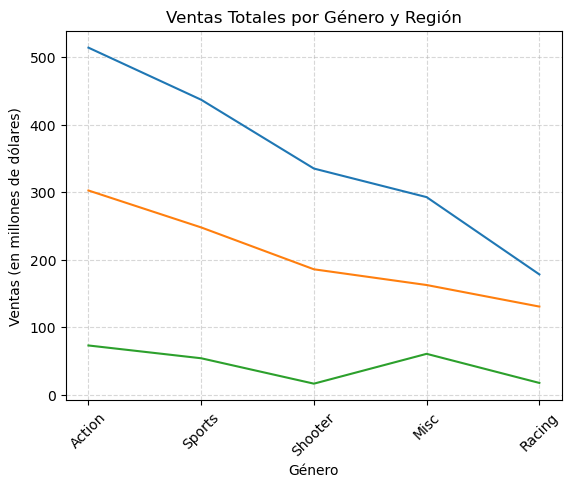

In [908]:
# Plotear las ventas por región para cada género
plt.plot(grp_genre['genre'], grp_genre['na_sales'], label='Ventas en América del Norte')
plt.plot(grp_genre['genre'], grp_genre['eu_sales'], label='Ventas en Europa')
plt.plot(grp_genre['genre'], grp_genre['jp_sales'], label='Ventas en Japón')

# Añadir etiquetas y título
plt.xlabel('Género')
plt.ylabel('Ventas (en millones de dólares)')
plt.title('Ventas Totales por Género y Región')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(['NA', 'EU', 'JP'])
plt.tight_layout()

In [868]:
#Ventas por clasificación ESRB y región, explica si las clasificaciones de ESRB afectan a las ventas en regiones individuales.
#Los 5 géneros más vendidos por región

grp_esrb = games_2.groupby('rating').agg({'na_sales':'sum', 'eu_sales':'sum', 'jp_sales':'sum'}).reset_index()

rating_sales = pd.melt(grp_esrb, id_vars= ['rating'], value_vars= ['na_sales', 'eu_sales', 'jp_sales'], var_name= 'market', value_name='sales').sort_values(by='sales', ascending=False)
rating_sales

,rating,market,sales
0,E,na_sales,878.97
3,M,na_sales,541.93
5,E,eu_sales,486.03
4,T,na_sales,476.77
8,M,eu_sales,317.06
1,E10+,na_sales,265.24
9,T,eu_sales,246.84
6,E10+,eu_sales,129.03
10,E,jp_sales,125.84
14,T,jp_sales,82.70


c:\Users\evely\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\evely\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\evely\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\evely\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

<Axes: xlabel='market', ylabel='sales'>

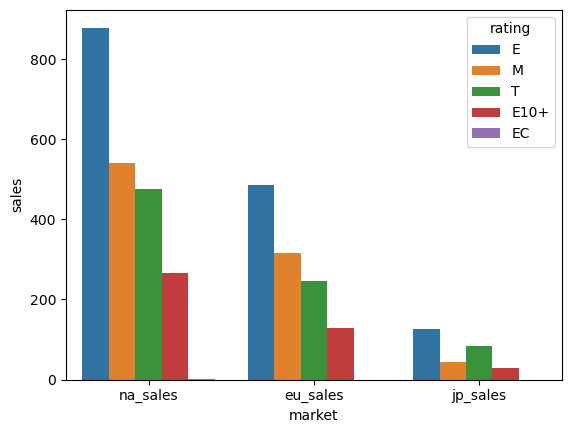

In [869]:
sns.barplot(data=rating_sales, x='market', y='sales', hue='rating')

### Conclusiones generales

Venta de plataformas por mercado:

- Considerando que en Europa, y Norte América abarcan más países y por lo tanto tienen una mayor población, se puede considerar que es normal que el tercer mercado el cual sólo abarca a Japón, obtenga menores ventas en cuanto a plataformas.
- La plataforma más vendida en Norte América es "X360" mientras que en Japón es la que menos ventas generó.
- La plataforma PS2 se mantuvo como una plataforma líder en los tres mercados siendo la más vendida en Europa y la segunda más vendida por poca diferencia en Norte América y Japón. 

Ventas totales por género y región:

- Los juegos de acción lideran las ventas de las tres regiones.

Ventas totales por clasificación ESBR Y región:

- La clasificación 'E' es la que más ventas generó en cada región siendo la que es apropiada para todas las edades. Por otro lado, la clasificación 'EC', no generó ventas significativas en ninguna de las tres regiones.


## Paso 5. Prueba las siguientes hipótesis:

* Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.
* Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

Establece tu mismo el valor de umbral alfa.

Explica:

* Cómo formulaste las hipótesis nula y alternativa.
* Qué criterio utilizaste para probar las hipótesis y por qué.

### Hipotesis 1:

1. Formulamos hipotesis nula y alternativa:

- H0: Las calificaciones promedio de los usuarios de Xbox One y Pc son las mismas.
- H1: las calificaciones promedio de los usuarios de Xbox One y Pc son distintas.

2. Obtener la informaión que deseamos
* Necesistamos tener los datos en dos series separadas y SIN valores ausentes.

3. Definir el test y el nivel de significancia.

* Usamos el nivel de significancia estandar de alfa de 0.05
* Comparar dos categorías (XOne y PC) con respecto a una variable numérica ('user_score'), en donde desconocemos la desviación estandar por lo que podemos usar el t-test.

In [909]:
#Obtenemos dos series de los scores de las plataformas sin valores ausentes
score_xone = df_games[df_games['platform'] == 'XOne']['user_score'].dropna()
score_pc = df_games[df_games['platform'] == 'PC']['user_score'].dropna()

alpha = .05 #establece un nivel crítico de significación estadística

results = st.ttest_ind(score_xone, score_pc) #prueba la hipótesis de que las medias de las dos poblaciones independientes son iguales

print(f"""
La clasificación promedio de profesionales para la Xbox es: {score_xone.mean()}
La clasificación promedio de profesionales para la PC es: {score_pc.mean()}

valor p: {results.pvalue}  
""")


if (results.pvalue < alpha):
    print("Rechazamos nuestra hipótesis nula")
else:
    print("No podemos rechazar nuestra hipótesis nula")


La clasificación promedio de profesionales para la Xbox es: 6.521428571428572
La clasificación promedio de profesionales para la PC es: 7.065960264900661

valor p: 1.3037979620149106e-05  

Rechazamos nuestra hipótesis nula


### Hipotesis 2:

1. Formulamos hipotesis nula y alternativa:

- H0: las calificaciones promedio de los usuarios de los géneros Action y Sports son las mismas.
- H1: las calificaciones promedio de los usuarios de los géneros Action y Sports son distintas.

2. Obtener la informaión que deseamos
* Necesistamos tener los datos en dos series separadas y SIN valores ausentes.

3. Definir el test y el nivel de significancia.

* Usamos el nivel de significancia estandar de alfa de 0.05
* Comparar dos categorías de géneros (Action y Sports) con respecto a una variable numérica ('user_score'), en donde desconocemos la desviación estandar por lo que podemos usar el t-test.

In [871]:
#Obtenemos dos series de los scores de las plataformas sin valores ausentes
score_action = df_games[df_games['genre'] == 'Action']['user_score'].dropna()
score_sports = df_games[df_games['genre'] == 'Sports']['user_score'].dropna()

alpha = .05 #establece un nivel crítico de significación estadística

results = st.ttest_ind(score_action, score_sports) #prueba la hipótesis de que las medias de las dos poblaciones independientes son iguales

print(f"""
La clasificación promedio de usuarios para el género Action es: {score_action.mean()}
La clasificación promedio de usuarios para el género Sports es: {score_sports.mean()}

valor p: {results.pvalue}
""")

if (results.pvalue < alpha):
    print("Rechazamos nuestra hipótesis nula")
else:
    print("No podemos rechazar nuestra hipótesis nula")


La clasificación promedio de usuarios para el género Action es: 7.058129175946549
La clasificación promedio de usuarios para el género Sports es: 6.951433857539316

valor p: 0.06480928064420527

No podemos rechazar nuestra hipótesis nula


## Paso 6. Conclusión general



Sugerencia: Investigar la falta de calificaciones y ratings: Dado que hay una alta proporción de juegos sin calificaciones, especialmente aquellos que también carecen de un rating de ESRB, sería prudente investigar por qué no se les asignó una calificación. Esto podría ayudar a comprender mejor si se trata de un error de registro, un problema con la clasificación del juego o alguna otra razón.


* Podemos observar un aumento significativo de la cantidad de juegos lanzados por año a partir de los 2000, y hubo un segundo aumento más notable a partir del 2005 hasta el 2010 que se estandarizó la cantidad de juegos por año.


**Top consolas**

* Las consolas con mayores ventas en América del Norte, Europa y Japón son: PS2 (2000), XBOX 360 (2005), PS3 (2006), Wii (2006) y DS (2004). (año de lanzamiento)
* La consola PlayStation 2 se consolida como la líder en ventas de juegos y entre las 5 más vendidas le sigue su tercera edición.

* El promedio de las ventas totales por plataforma va desde los 0.37 millones hasta los 0.78 millones, sin embargo, tenemos valores atípicos muy altos de hasta 80 millones como sucede en la consola Wii, por lo que se sugiere tomar la mediana como medida para analizar las ventas que ronda de los 0.10 hasta los 0.27 millones dependiendo de que consola hablemos.

**Ciclo de vida**

* Los años con mayores ventas en juegos (2000-2010), coincide con los años de lanzamiento de estas plataformas y podemos ver que cada una tiene un ciclo de vida donde las ventas aumentan los primeros años y descienden luego de un periodo máximo de 6 años hasta que deja de ser popular.


**Juegos multiplataforma**

* Los juegos multiplataforma con ventas mayores a 10 millones pertenecen principalmente al género de ‘Shooter’ y ‘Action’, su rating (ESRB) corresponde a “M” y existen para consolas como Xbox 360 y PlayStation 3.

**Ventas por género**

* Los juegos de "Sports" y "Acción" son los dos géneros con mayores ventas acumuladas.
* Podemos observar mucho sesgo positivo en los juegos de Sports ya que la media ronda por los 0.70 millones mientras que la mediana muestra que ronda por los 0.23 millones, esto se debe a valores atípicos de hasta 80 millones. Esto se debe a un juego en específico de la consola Wii (Wii Sports).
* En el caso de los juegos de Acción, el promedio de las ventas ronda por los 0.64 millones y la mediana está entre los 0.25 millones. El 75% de sus ventas están por debajo de los 0.60 millones.


**Venta de plataformas por mercado:**

- Considerando que en Europa, y Norte América abarcan más países y por lo tanto tienen una mayor población, se puede considerar que es normal que el tercer mercado el cual sólo abarca a Japón obtenga menores ventas en cuanto a juegos por plataformas.
- La plataforma más vendida en Norte América es "X360" mientras que en Japón es la que menos ventas generó.
- La plataforma PS2 se mantuvo como una plataforma líder en los tres mercados siendo la más vendida en Europa y la segunda más vendida por poca diferencia en Norte América y Japón. 

**Ventas totales por género y región:**
- Los juegos de acción lideran las ventas de las tres regiones.

**Ventas totales por clasificación ESBR Y región:**
- La clasificación 'E' es la que más ventas generó en cada región siendo la que es apropiada para todas las edades. Por otro lado, la clasificación 'EC', no generó ventas significativas en ninguna de las tres regiones.

### En resumen:
El análisis del ciclo de vida de las consolas y su relación con las ventas de juegos es crucial. Comprender cómo cambian las ventas a lo largo del tiempo puede ayudar a predecir el rendimiento futuro de los juegos y planificar estrategias de lanzamiento y marketing de manera más efectiva.

Se observa un sesgo positivo en las ventas de ciertos géneros, como los juegos de deportes, debido a valores atípicos. Al considerar estos géneros, se debe tener en cuenta la presencia de juegos altamente exitosos que pueden distorsionar las métricas promedio.

Al considerar estas conclusiones y sugerencias, los desarrolladores y editores de juegos pueden tomar decisiones más informadas para maximizar el éxito de sus lanzamientos y optimizar su presencia en el mercado global de videojuegos.
